# Dependencies

# Imports

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Environment Setup

# Dataset Building

## Downloading

In [2]:
def load_game_of_thrones_data():
    # Lista dei nomi dei file CSV
    file_names = ['book1.csv', 'book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']

    # Dizionario per memorizzare i dataframe
    dataframes = {}

    # Itera attraverso i file e carica i dati
    for file_name in file_names:
        url = f'https://raw.githubusercontent.com/RiccardoRomeo01/SocialNetworkAnalysisProject/main/GameOfThronesDataset/{file_name}'
        dataframes[file_name] = pd.read_csv(url)

    return dataframes

In [3]:
# Utilizzo della funzione
dataframes = load_game_of_thrones_data()

# Accesso ai dataframe
book1_df = dataframes['book1.csv']
book2_df = dataframes['book2.csv']
book3_df = dataframes['book3.csv']
book4_df = dataframes['book4.csv']
book5_df = dataframes['book5.csv']

## Exploring

In [4]:
book1_df = book1_df.drop(labels=['book','Type'], axis=1)
book2_df = book2_df.drop(labels=['book','Type'], axis=1)
book3_df = book3_df.drop(labels=['book','Type'], axis=1)
book4_df = book4_df.drop(labels=['book','Type'], axis=1)
book5_df = book5_df.drop(labels=['book','Type'], axis=1)

In [5]:
book1_df.head()

,Source,Target,weight
0,Addam-Marbrand,Jaime-Lannister,3
1,Addam-Marbrand,Tywin-Lannister,6
2,Aegon-I-Targaryen,Daenerys-Targaryen,5
3,Aegon-I-Targaryen,Eddard-Stark,4
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4


In [6]:
all_book_df = pd.concat([book1_df, book2_df, book3_df, book4_df, book5_df])
all_book_df['Source'], all_book_df['Target'] = zip(*all_book_df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# Graph Creation

In [7]:
G_1 = nx.from_pandas_edgelist(book1_df, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(book2_df, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(book3_df, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(book4_df, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(book5_df, 'Source', 'Target', edge_attr=True)
G_all = nx.from_pandas_edgelist(all_book_df, 'Source', 'Target', edge_attr=True)

# Metrics

## Nodes

### Degree Centrality

In [30]:
def plot_degree_centrality(centrality, title, threshold=None, font_size=8, bar_width=1, spacing=1):
    """
    Plots the degree centrality of the given graph, filtering by a threshold if provided.

    Parameters:
    centrality (dict): The input graph centrality.
    title (str): The title for the plot.
    threshold (float or None): If None, all values are plotted. If a float, only values below this threshold are plotted.
    font_size (int): The font size for the node labels in the plot.
    bar_width (float): The width of the bars in the histogram.
    spacing (float): The space between the bars.

    Returns:
    None: The function displays a plot of degree centrality.
    """

    # Prepare data for plotting
    nodes = list(centrality.keys())
    values = list(centrality.values())

    # Filter values based on the threshold if it's not None
    if threshold is not None:
        filtered_nodes = [node for node, value in centrality.items() if value >= threshold]
        filtered_values = [value for value in values if value >= threshold]
    else:
        filtered_nodes = nodes
        filtered_values = values

    # Create x-coordinates for bars with spacing
    x_positions = np.arange(len(filtered_nodes)) * (bar_width + spacing)

    # Create the plot
    plt.figure(figsize=(15, 5))
    plt.bar(x_positions, filtered_values, color='skyblue', width=bar_width)  # Adjust bar positions here
    plt.xlabel('Nodes')
    plt.ylabel('Degree Centrality')
    plt.title(title, color="olivedrab")
    plt.xticks(x_positions + bar_width / 2, filtered_nodes, rotation=90, fontsize=font_size)  # Center labels
    plt.grid(axis='y')
    plt.xlim(-0.5, len(filtered_nodes) * (bar_width + spacing) - spacing)  # Limiti dell'asse x

    # Show the plot
    plt.tight_layout()
    plt.show()

    return dict(zip(filtered_nodes, filtered_values))

In [59]:
def common_keys(list_of_dict):
    """
    Restituisce una lista delle chiavi comuni tra tutti i dizionari in input.

    Parameters:
    list_of_dict (list): Una lista di dizionari.

    Returns:
    list: Una lista delle chiavi comuni.
    """
    if not list_of_dict:
        return []

    # Inizializza le chiavi comuni con le chiavi del primo dizionario
    chiavi_comuni = set(list_of_dict[0].keys())

    # Itera attraverso gli altri dizionari e aggiorna le chiavi comuni
    for dizionario in list_of_dict[1:]:
        chiavi_comuni.intersection_update(dizionario.keys())

    return list(chiavi_comuni)

In [76]:
def show_evolution(dizionari_libri, personaggi, xlabel="Books", ylabel="", title=""):
    """
    Shows the evolution of character grades across the 5 books of Game of Thrones.

    Parameters:
    dizionari_libri (list): A list of 5 dictionaries, each containing the grades of characters for one book.
                             Each dictionary should have the structure:
                             {'character': grade}
    personaggi (list): A list of characters to display.
    title (str): The title of the graph.

    Returns:
    None: The function displays the graph.
    """

    # Create a list of grades for each character
    gradi = {personaggio: [] for personaggio in personaggi}

    # Extract grades from the dictionaries
    for dizionario in dizionari_libri:
        for personaggio in personaggi:
            grado = dizionario.get(personaggio)
            gradi[personaggio].append(grado if grado is not None else 0)  # Use 0 if the character is not present

    # Create the graph
    plt.figure(figsize=(12, 6))

    for personaggio in personaggi:
        plt.plot(gradi[personaggio], marker='o', label=personaggio)

    # Add labels and title
    plt.title(title,color="olivedrab")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(5), labels=[f'Book {i+1}' for i in range(5)])
    plt.legend()
    plt.grid(axis='y')

    # Show the graph
    plt.tight_layout()
    plt.show()

In [9]:
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_all = nx.degree_centrality(G_all)

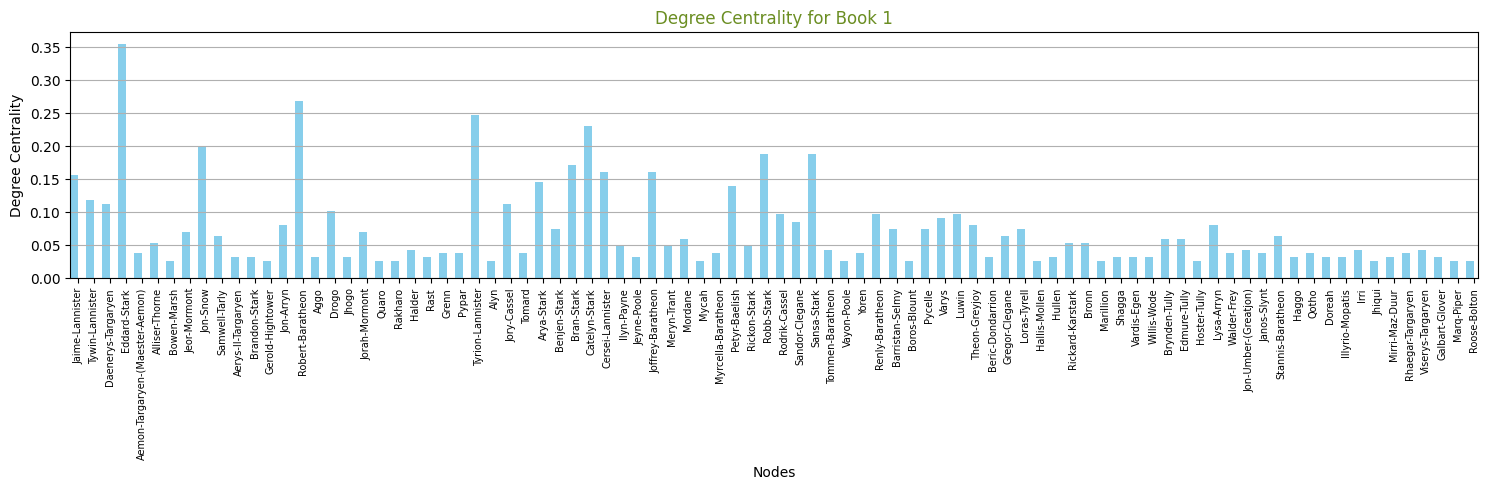

In [48]:
top_degree_nodes_1 = plot_degree_centrality(degree_1, 'Degree Centrality for Book 1', font_size=7, threshold=0.025)

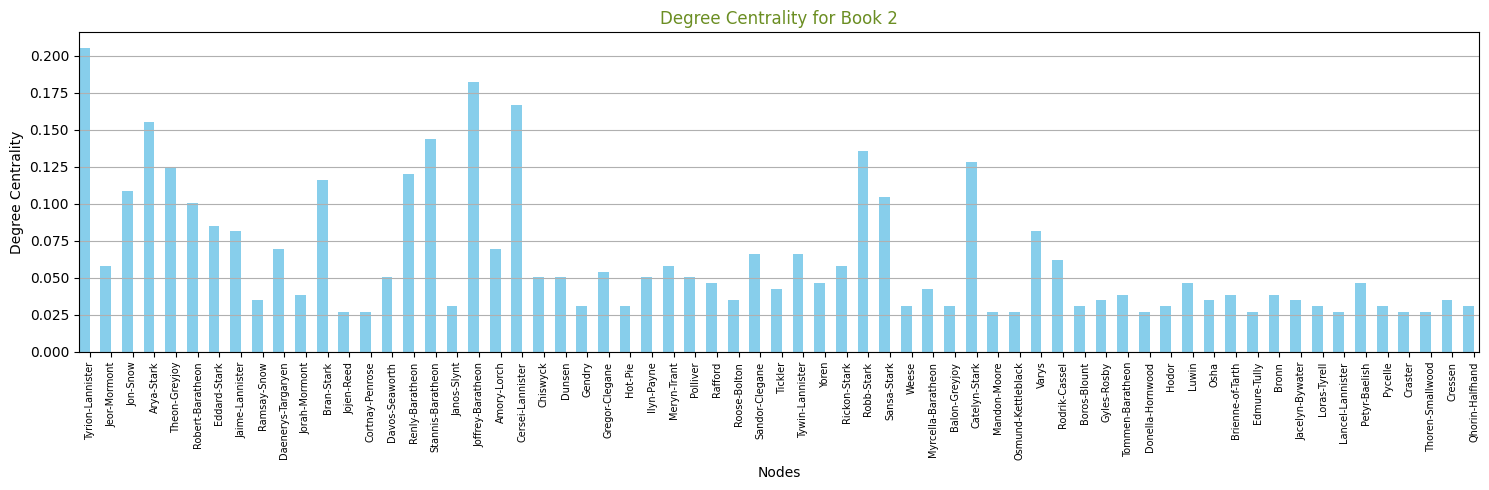

In [49]:
top_degree_nodes_2 = plot_degree_centrality(degree_2, 'Degree Centrality for Book 2', font_size=7, threshold=0.025)

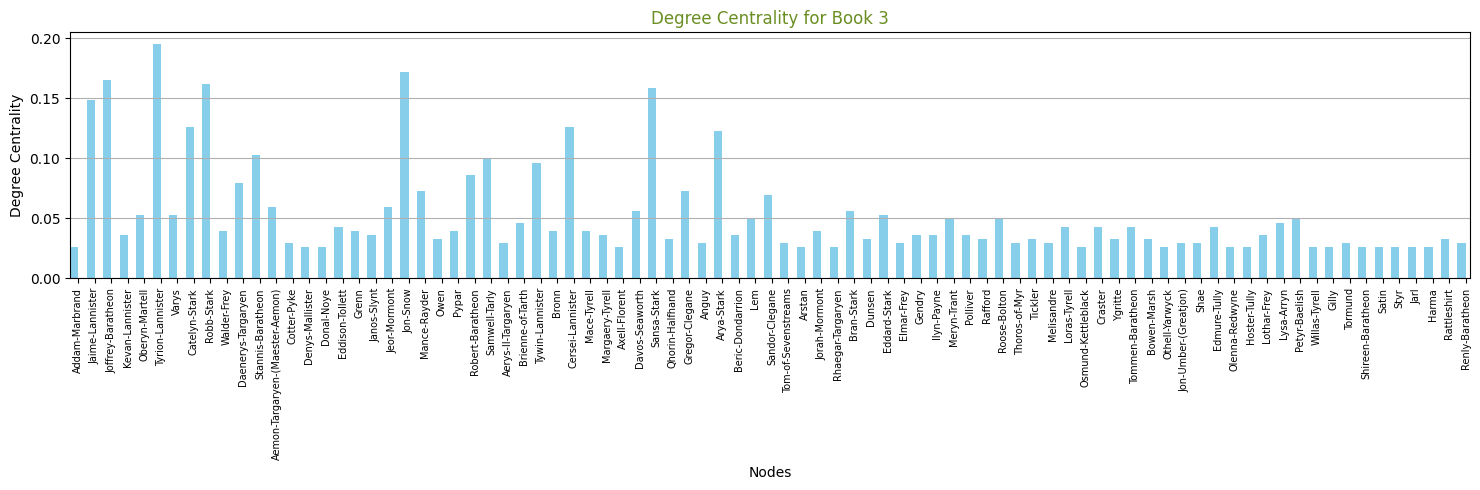

In [50]:
top_degree_nodes_3 = plot_degree_centrality(degree_3, 'Degree Centrality for Book 3', font_size=7, threshold=0.025)

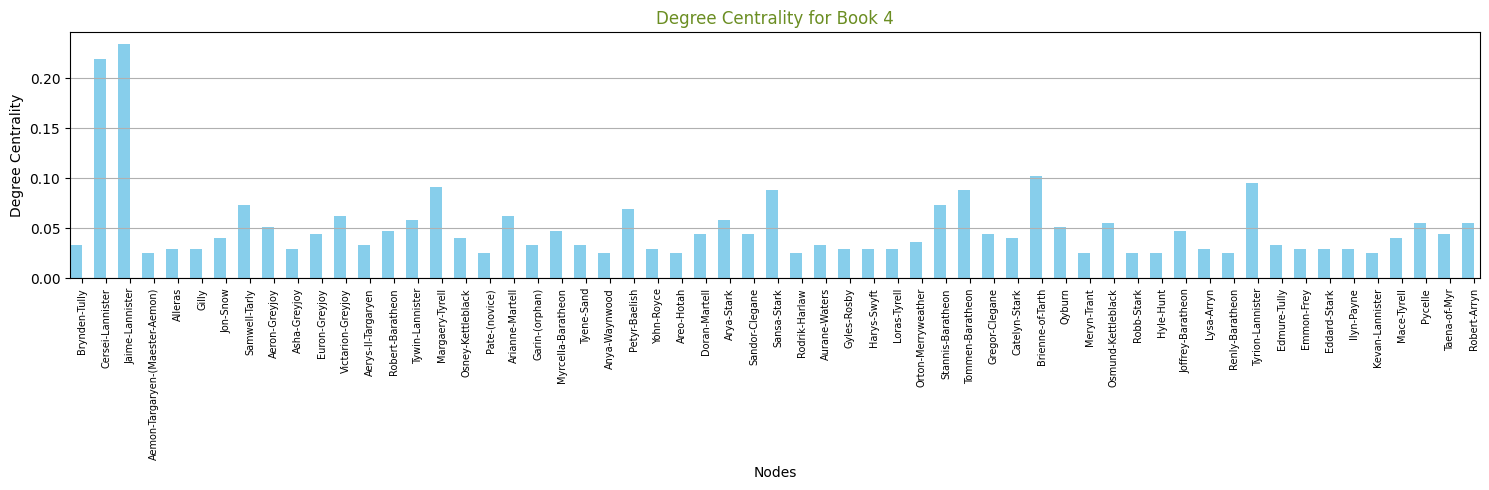

In [51]:
top_degree_nodes_4 = plot_degree_centrality(degree_4, 'Degree Centrality for Book 4', font_size=7, threshold=0.025)

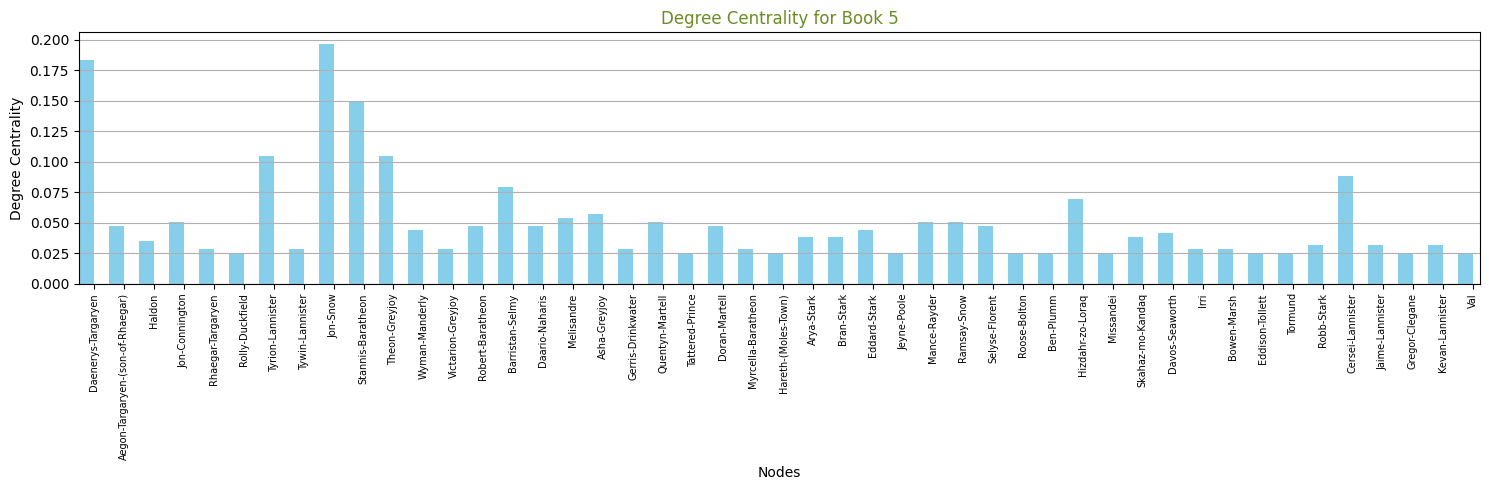

In [52]:
top_degree_nodes_5 = plot_degree_centrality(degree_5, 'Degree Centrality for Book 5', font_size=7, threshold=0.025)

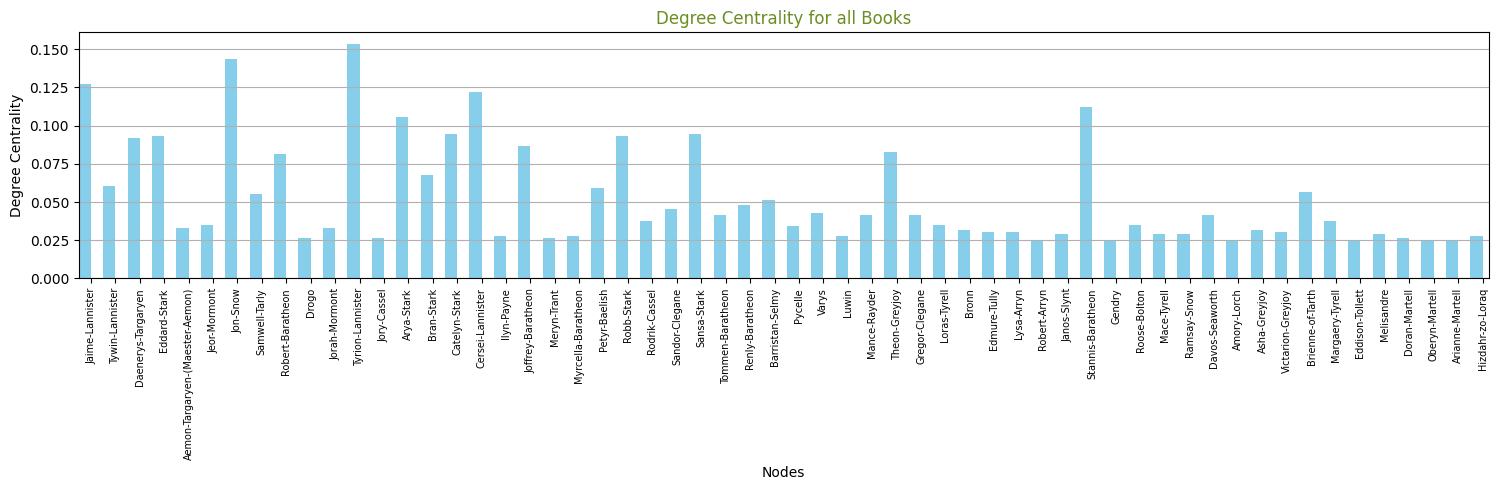

In [53]:
top_degree_nodes_all = plot_degree_centrality(degree_all, 'Degree Centrality for all Books', font_size=7, threshold=0.025)

In [60]:
top_common_nodes_DC = common_keys([top_degree_nodes_1, top_degree_nodes_2, top_degree_nodes_3, top_degree_nodes_4, top_degree_nodes_5])

In [61]:
top_common_nodes_DC

['Stannis-Baratheon',
 'Eddard-Stark',
 'Tyrion-Lannister',
 'Jaime-Lannister',
 'Tywin-Lannister',
 'Robb-Stark',
 'Cersei-Lannister',
 'Gregor-Clegane',
 'Jon-Snow',
 'Arya-Stark',
 'Robert-Baratheon']

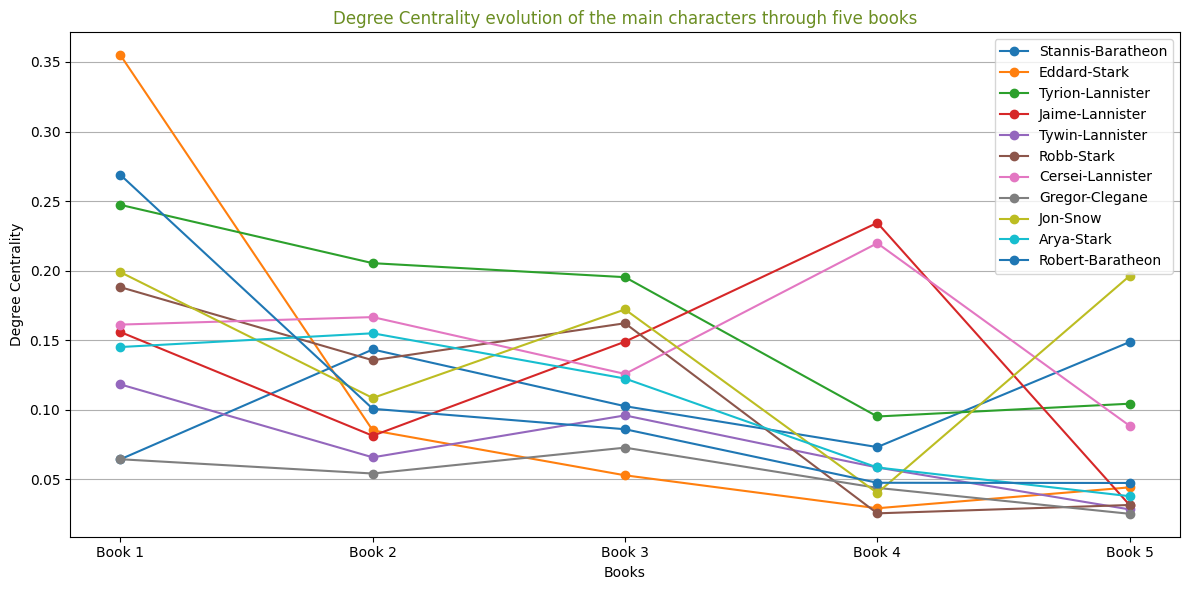

In [77]:
show_evolution([top_degree_nodes_1, top_degree_nodes_2, top_degree_nodes_3, top_degree_nodes_4, top_degree_nodes_5],
                        top_common_nodes_DC,
                        title="Degree Centrality evolution of the main characters through five books",
                        xlabel="Books",
                        ylabel="Degree Centrality")

### Eigenvector Centrality

In [78]:
def plot_eig_centrality(centrality, title, threshold=None, font_size=8, bar_width=1, spacing=1):
    """
    Plots the Eigenvector centrality of the given graph, filtering by a threshold if provided.

    Parameters:
    centrality (dict): The input graph centrality.
    title (str): The title for the plot.
    threshold (float or None): If None, all values are plotted. If a float, only values below this threshold are plotted.
    font_size (int): The font size for the node labels in the plot.
    bar_width (float): The width of the bars in the histogram.
    spacing (float): The space between the bars.

    Returns:
    None: The function displays a plot of degree centrality.
    """

    # Prepare data for plotting
    nodes = list(centrality.keys())
    values = list(centrality.values())

    # Filter values based on the threshold if it's not None
    if threshold is not None:
        filtered_nodes = [node for node, value in centrality.items() if value >= threshold]
        filtered_values = [value for value in values if value >= threshold]
    else:
        filtered_nodes = nodes
        filtered_values = values

    # Create x-coordinates for bars with spacing
    x_positions = np.arange(len(filtered_nodes)) * (bar_width + spacing)

    # Create the plot
    plt.figure(figsize=(15, 5))
    plt.bar(x_positions, filtered_values, color='skyblue', width=bar_width)  # Adjust bar positions here
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvector centrality')
    plt.title(title, color="olivedrab")
    plt.xticks(x_positions + bar_width / 2, filtered_nodes, rotation=90, fontsize=font_size)  # Center labels
    plt.grid(axis='y')
    plt.xlim(-0.5, len(filtered_nodes) * (bar_width + spacing) - spacing)  # Limiti dell'asse x

    # Show the plot
    plt.tight_layout()
    plt.show()

    return dict(zip(filtered_nodes, filtered_values))

In [83]:
eig_1 = nx.eigenvector_centrality(G_1, weight='Weight')
eig_2 = nx.eigenvector_centrality(G_2, weight='Weight')
eig_3 = nx.eigenvector_centrality(G_3, weight='Weight')
eig_4 = nx.eigenvector_centrality(G_4, weight='Weight')
eig_5 = nx.eigenvector_centrality(G_5, weight='Weight', max_iter=200)
eig_all = nx.eigenvector_centrality(G_all, weight='Weight')

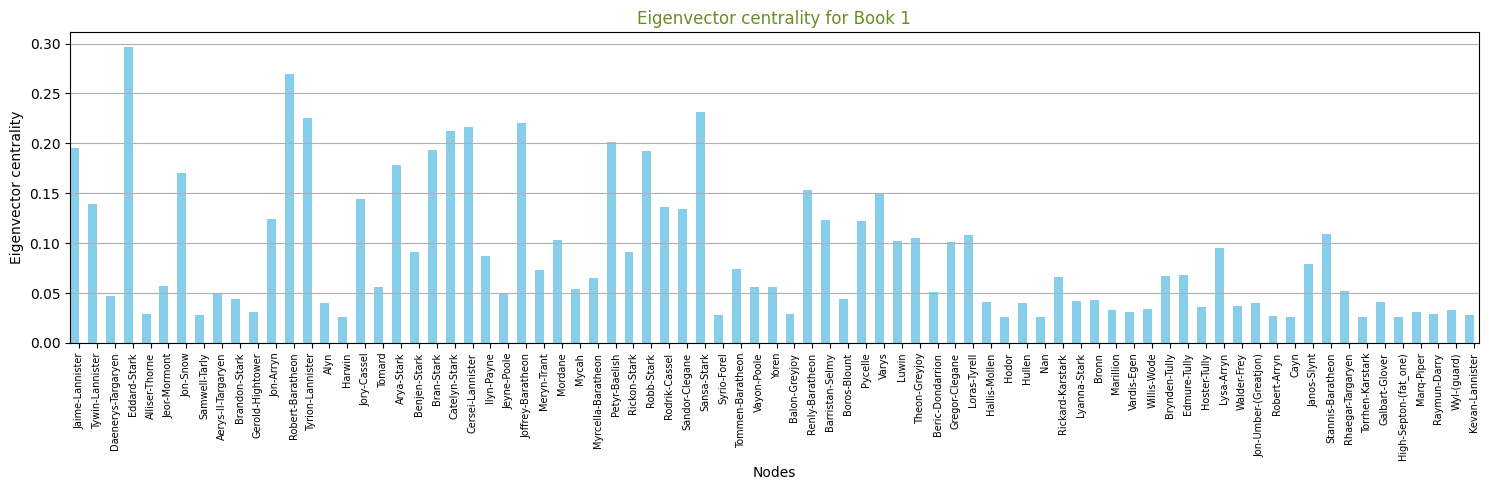

In [85]:
top_eig_nodes_1 = plot_eig_centrality(eig_1, 'Eigenvector centrality for Book 1', font_size=7, threshold=0.025)

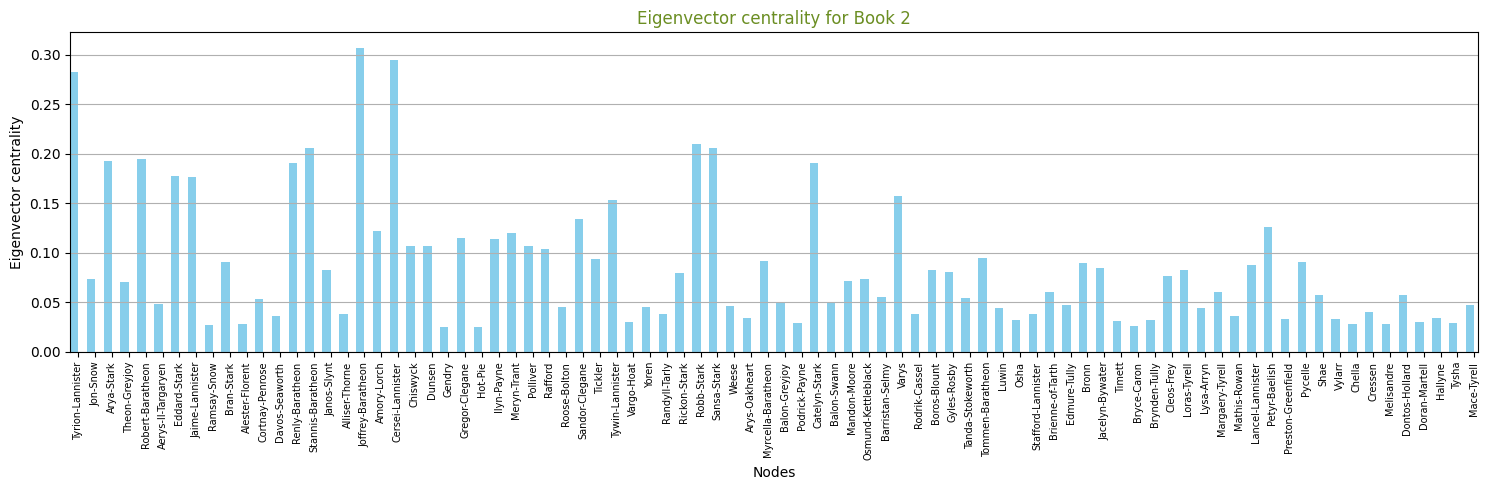

In [86]:
top_eig_nodes_2 = plot_eig_centrality(eig_2, 'Eigenvector centrality for Book 2', font_size=7, threshold=0.025)

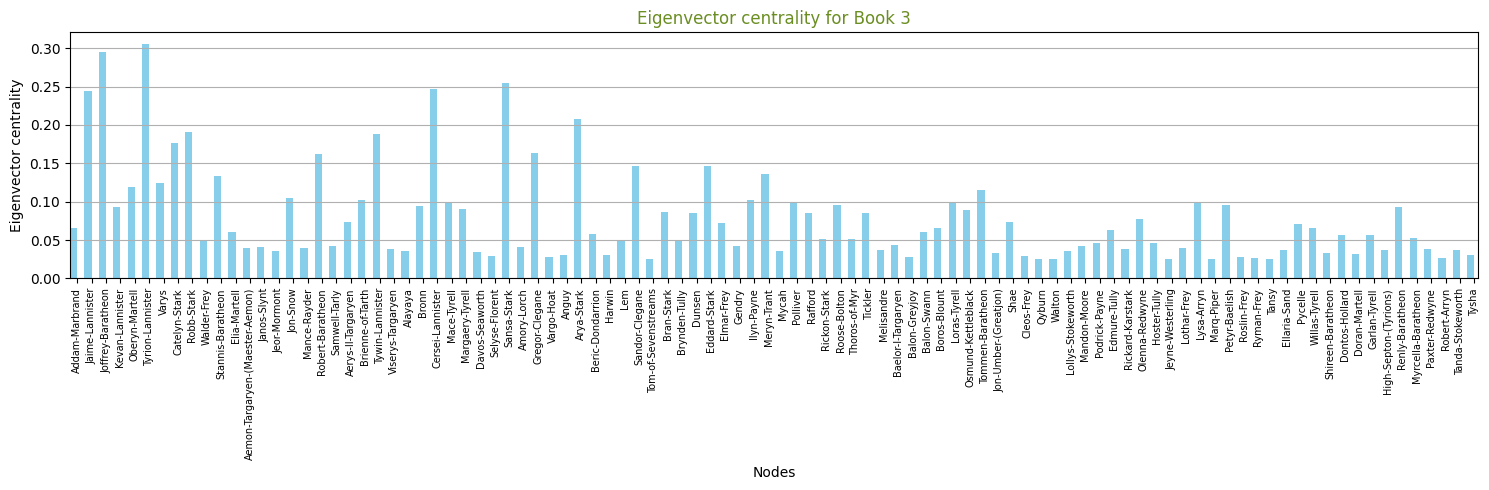

In [87]:
top_eig_nodes_3 = plot_eig_centrality(eig_3, 'Eigenvector centrality for Book 3', font_size=7, threshold=0.025)

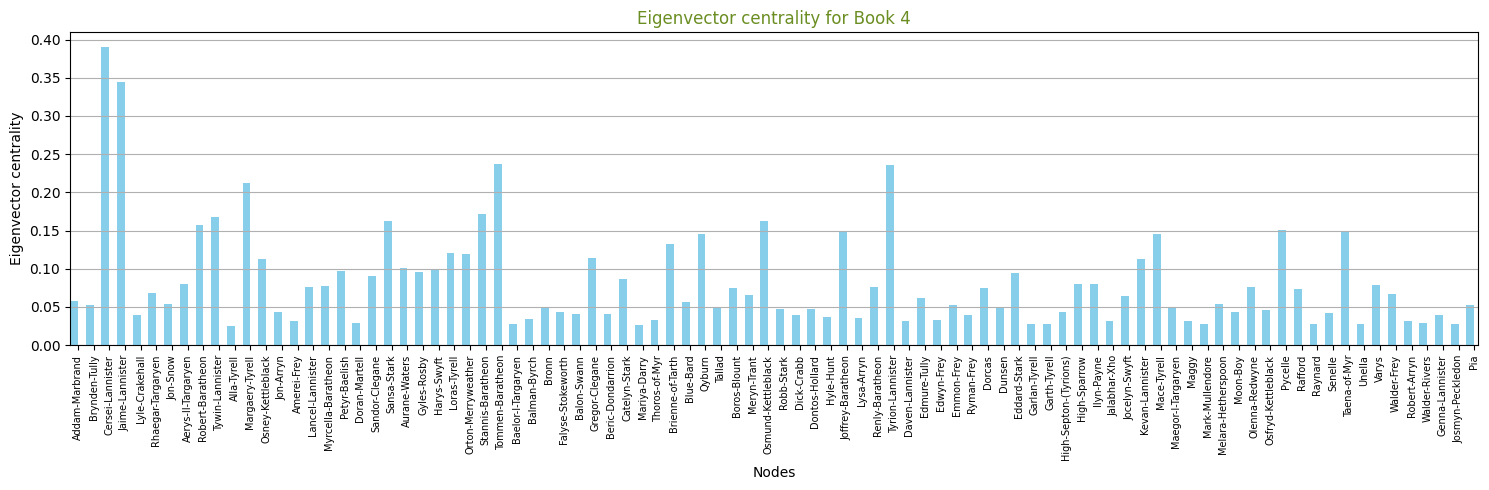

In [88]:
top_eig_nodes_4 = plot_eig_centrality(eig_4, 'Eigenvector centrality for Book 4', font_size=7, threshold=0.025)

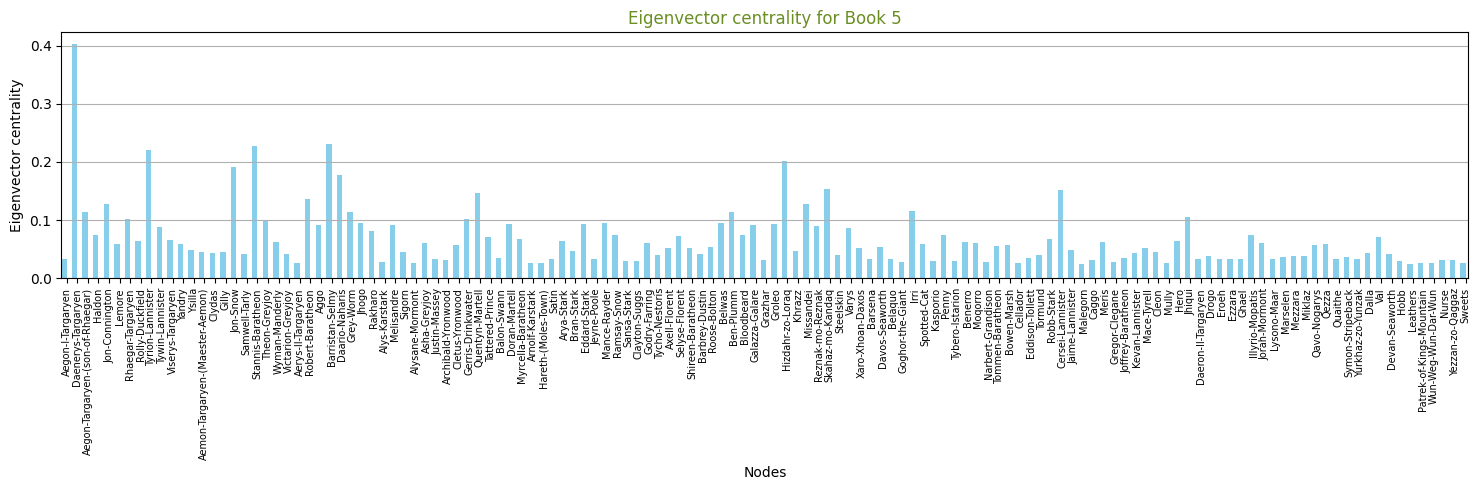

In [89]:
top_eig_nodes_5 = plot_eig_centrality(eig_5, 'Eigenvector centrality for Book 5', font_size=7, threshold=0.025)

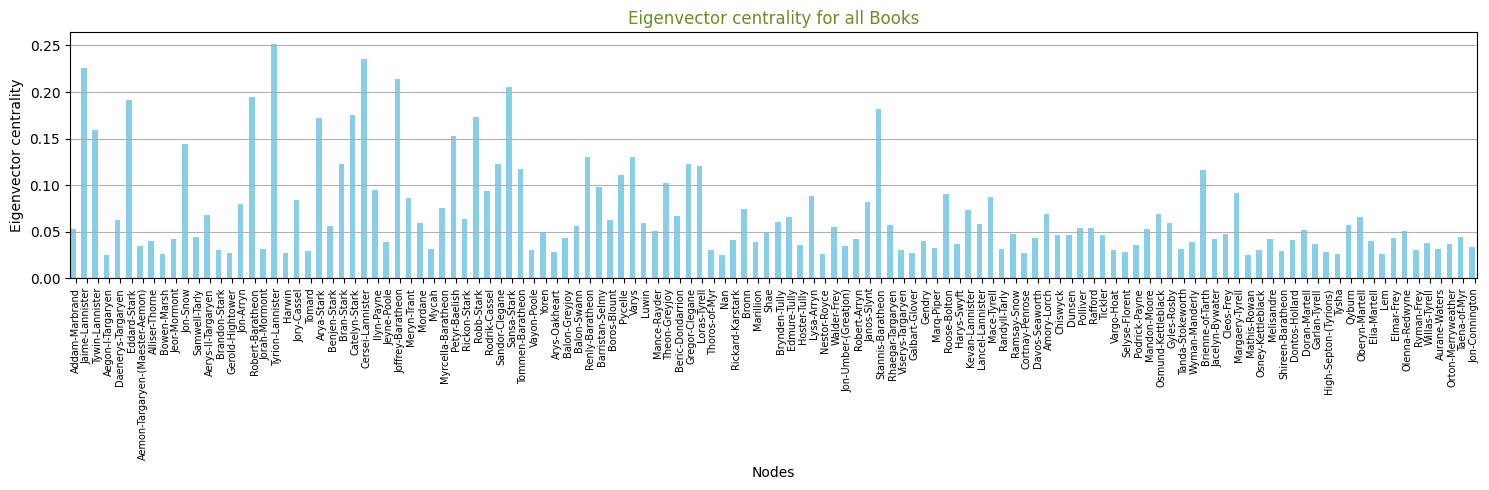

In [91]:
top_eig_nodes_all = plot_eig_centrality(eig_all, 'Eigenvector centrality for all Books', font_size=7, threshold=0.025)

In [92]:
top_common_nodes_EVC = common_keys([top_eig_nodes_1, top_eig_nodes_2, top_eig_nodes_3, top_eig_nodes_4, top_eig_nodes_5])

In [93]:
top_common_nodes_EVC

['Stannis-Baratheon',
 'Myrcella-Baratheon',
 'Eddard-Stark',
 'Tyrion-Lannister',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Gregor-Clegane',
 'Tywin-Lannister',
 'Robb-Stark',
 'Cersei-Lannister',
 'Aerys-II-Targaryen',
 'Varys',
 'Sansa-Stark',
 'Jon-Snow',
 'Tommen-Baratheon',
 'Robert-Baratheon']

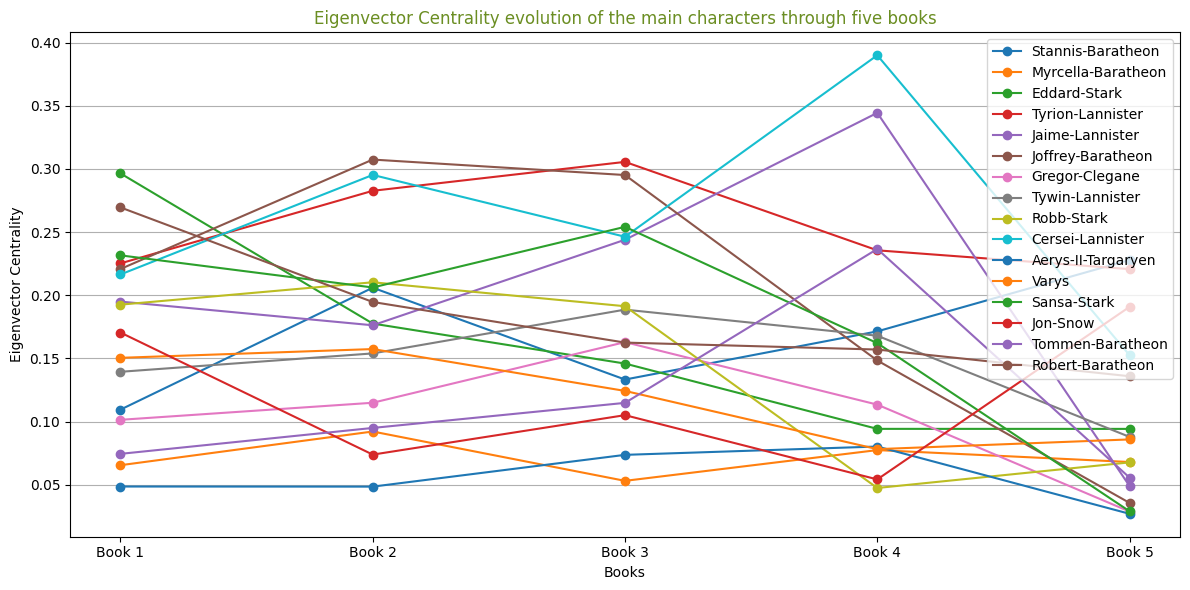

In [94]:
show_evolution([top_eig_nodes_1, top_eig_nodes_2, top_eig_nodes_3, top_eig_nodes_4, top_eig_nodes_5],
                        top_common_nodes_EVC,
                        title="Eigenvector Centrality evolution of the main characters through five books",
                        xlabel="Books",
                        ylabel="Eigenvector Centrality")

### Katz Centrality

In [95]:
def plot_katz_centrality(centrality, title, threshold=None, font_size=8, bar_width=1, spacing=1):
    """
    Plots the Katz centrality of the given graph, filtering by a threshold if provided.

    Parameters:
    centrality (dict): The input graph centrality.
    title (str): The title for the plot.
    threshold (float or None): If None, all values are plotted. If a float, only values below this threshold are plotted.
    font_size (int): The font size for the node labels in the plot.
    bar_width (float): The width of the bars in the histogram.
    spacing (float): The space between the bars.

    Returns:
    None: The function displays a plot of degree centrality.
    """

    # Prepare data for plotting
    nodes = list(centrality.keys())
    values = list(centrality.values())

    # Filter values based on the threshold if it's not None
    if threshold is not None:
        filtered_nodes = [node for node, value in centrality.items() if value >= threshold]
        filtered_values = [value for value in values if value >= threshold]
    else:
        filtered_nodes = nodes
        filtered_values = values

    # Create x-coordinates for bars with spacing
    x_positions = np.arange(len(filtered_nodes)) * (bar_width + spacing)

    # Create the plot
    plt.figure(figsize=(15, 5))
    plt.bar(x_positions, filtered_values, color='skyblue', width=bar_width)  # Adjust bar positions here
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvector centrality')
    plt.title(title, color="olivedrab")
    plt.xticks(x_positions + bar_width / 2, filtered_nodes, rotation=90, fontsize=font_size)  # Center labels
    plt.grid(axis='y')
    plt.xlim(-0.5, len(filtered_nodes) * (bar_width + spacing) - spacing)  # Limiti dell'asse x

    # Show the plot
    plt.tight_layout()
    plt.show()

    return dict(zip(filtered_nodes, filtered_values))

In [133]:
katz_1 = nx.katz_centrality_numpy(G_1)
katz_2 = nx.katz_centrality_numpy(G_2)
katz_3 = nx.katz_centrality_numpy(G_3)
katz_4 = nx.katz_centrality_numpy(G_4)
katz_5 = nx.katz_centrality_numpy(G_5)
katz_all = nx.katz_centrality_numpy(G_all)

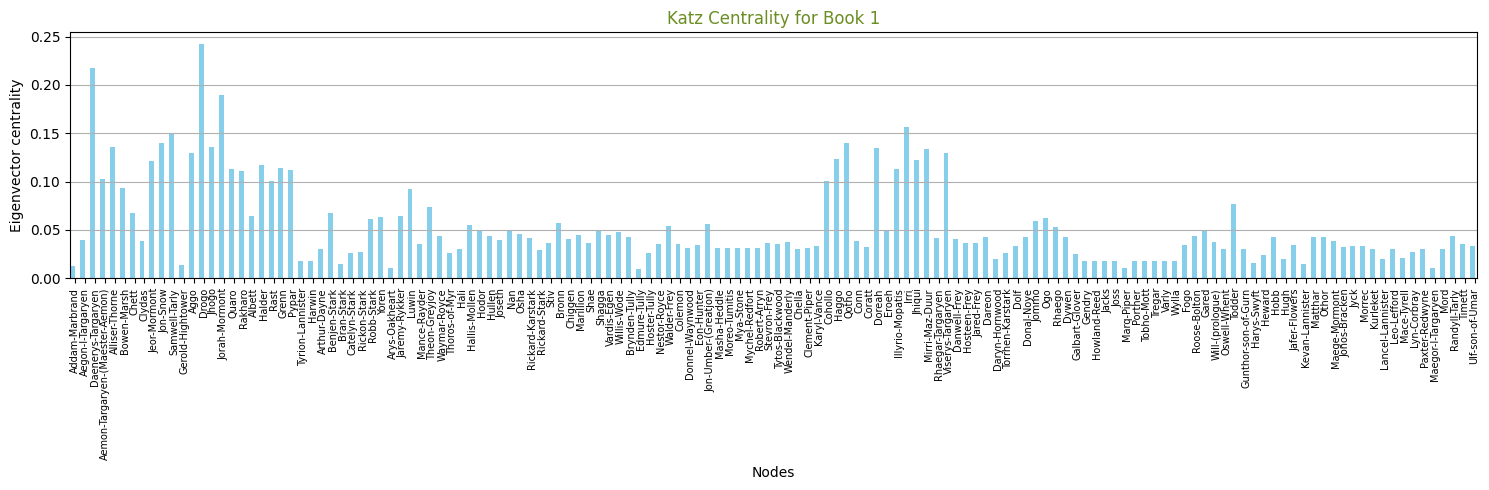

In [152]:
top_katz_nodes_1 = plot_katz_centrality(katz_1, 'Katz Centrality for Book 1', font_size=7, threshold=0.01)

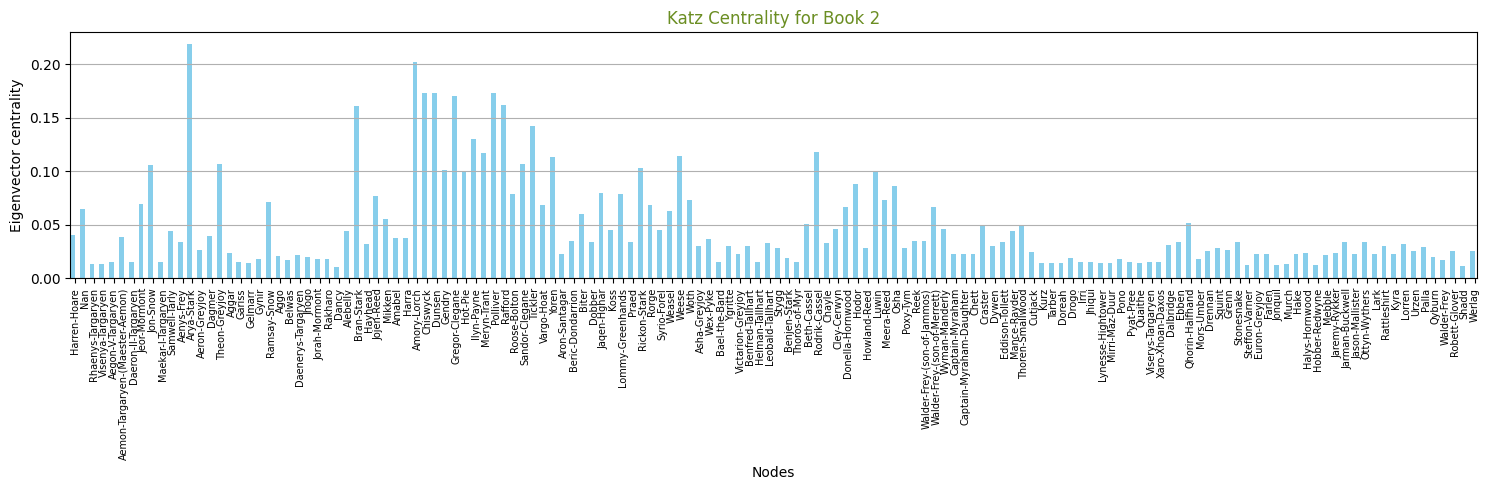

In [153]:
top_katz_nodes_2 = plot_katz_centrality(katz_2, 'Katz Centrality for Book 2', font_size=7, threshold=0.01)

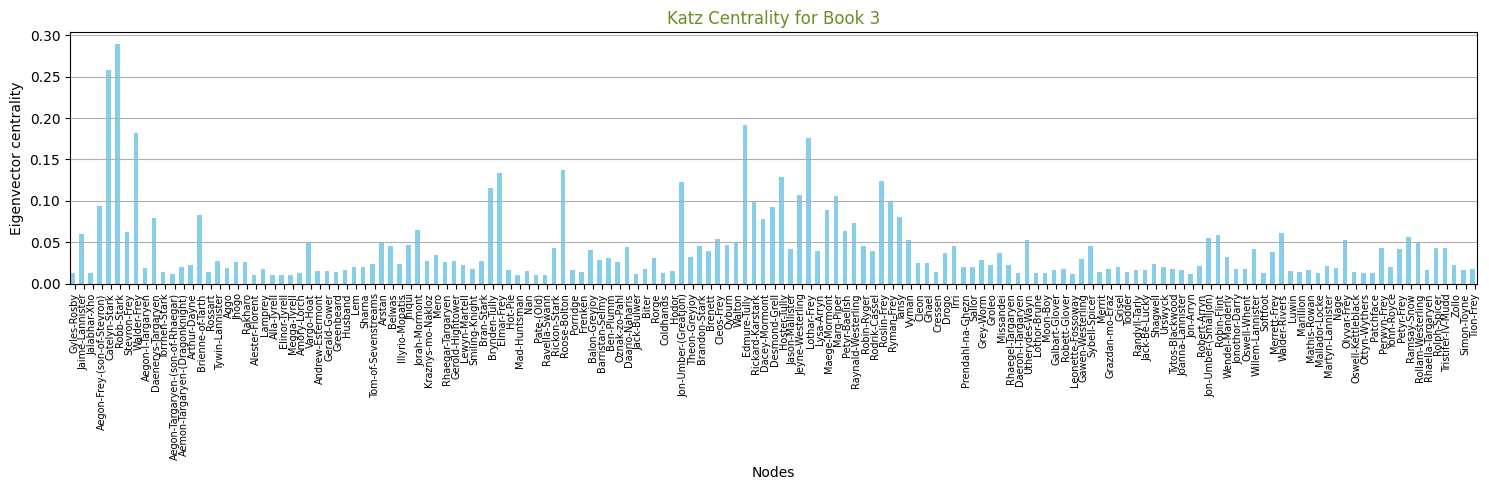

In [154]:
top_katz_nodes_3 = plot_katz_centrality(katz_3, 'Katz Centrality for Book 3', font_size=7, threshold=0.01)

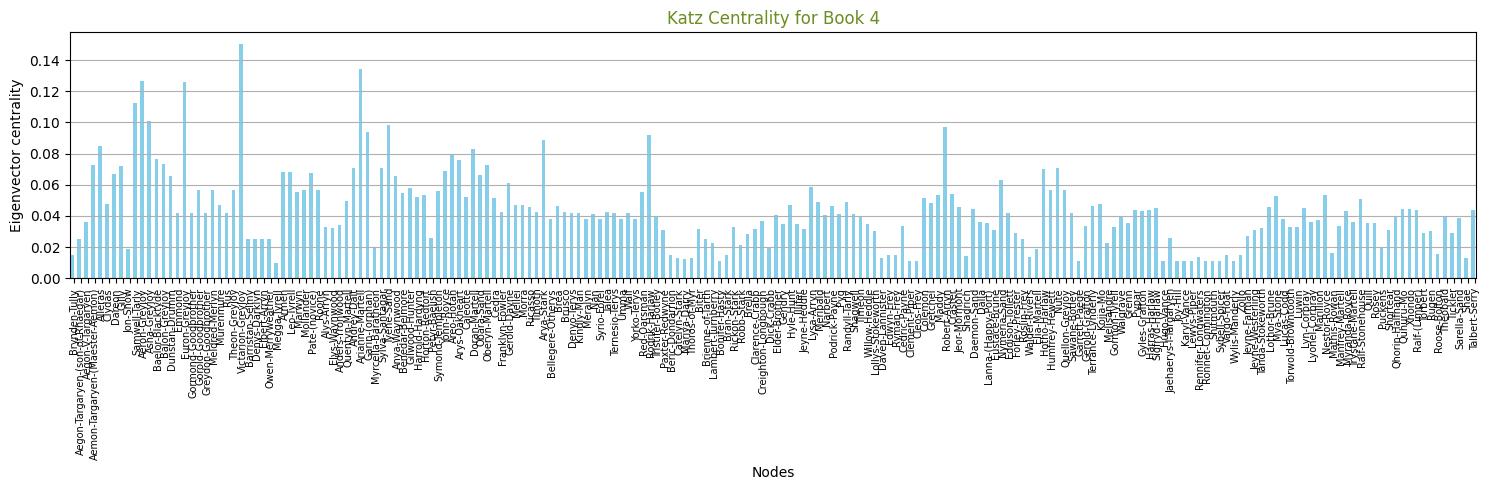

In [155]:
top_katz_nodes_4 = plot_katz_centrality(katz_4, 'Katz Centrality for Book 4', font_size=7, threshold=0.01)

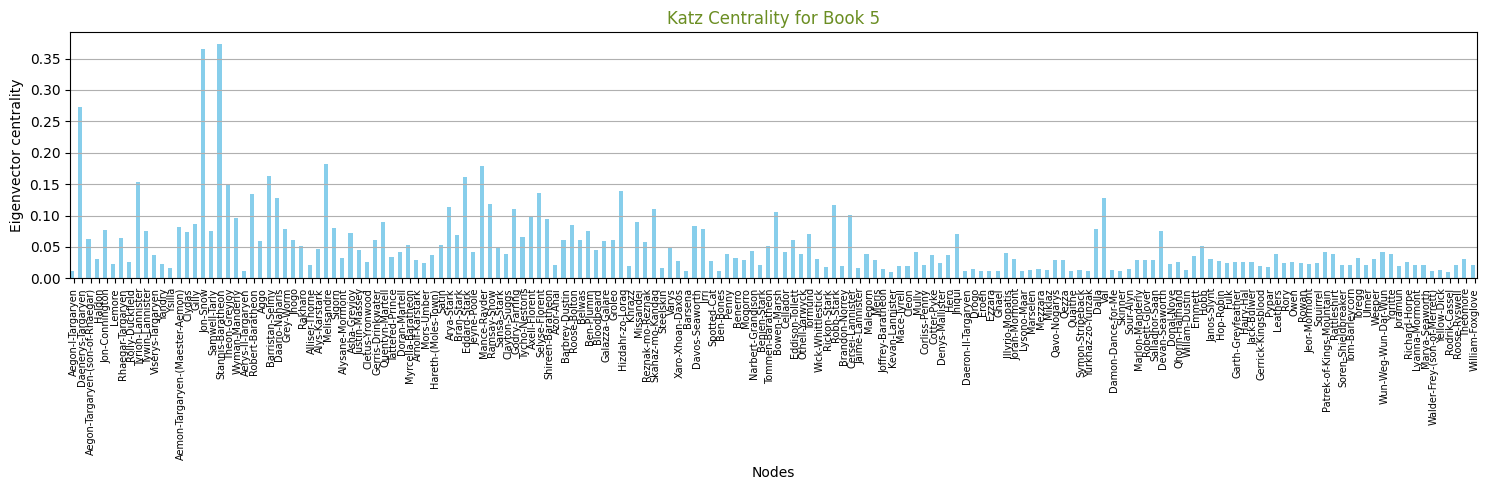

In [156]:
top_katz_nodes_5 = plot_katz_centrality(katz_5, 'Katz Centrality for Book 5', font_size=7, threshold=0.01)

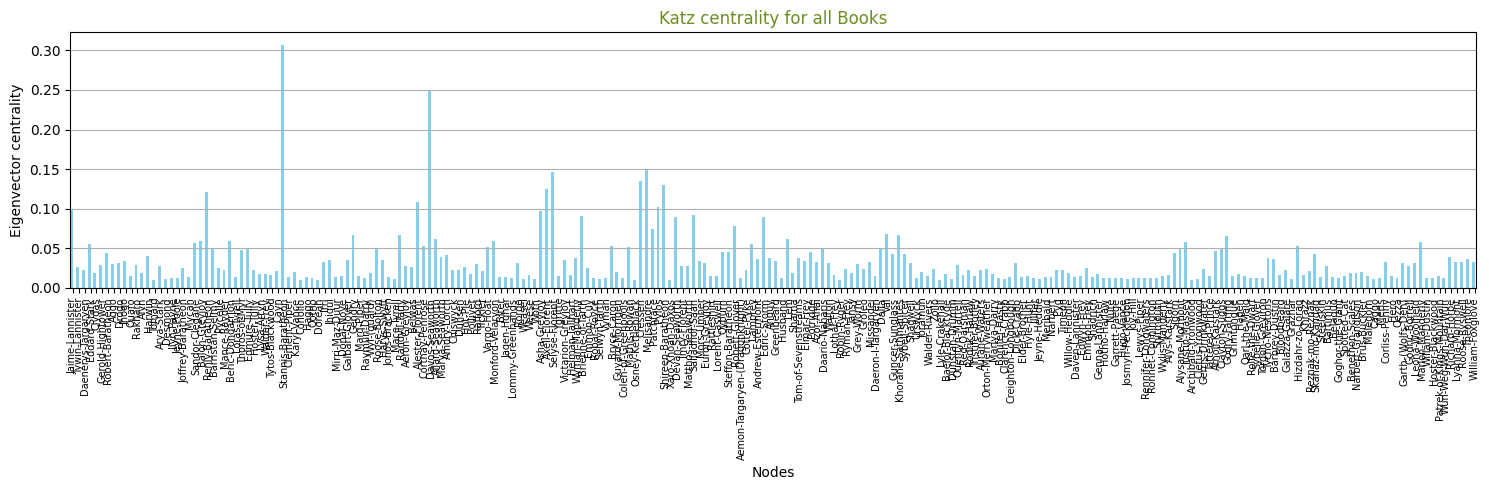

In [157]:
top_katz_nodes_all = plot_katz_centrality(katz_all, 'Katz centrality for all Books', font_size=7, threshold=0.01)

In [158]:
top_common_nodes_KC = common_keys([top_katz_nodes_1, top_katz_nodes_2, top_katz_nodes_3, top_katz_nodes_4, top_katz_nodes_5])

In [159]:
top_common_nodes_KC

['Roose-Bolton', 'Rickon-Stark', 'Bran-Stark', 'Theon-Greyjoy']

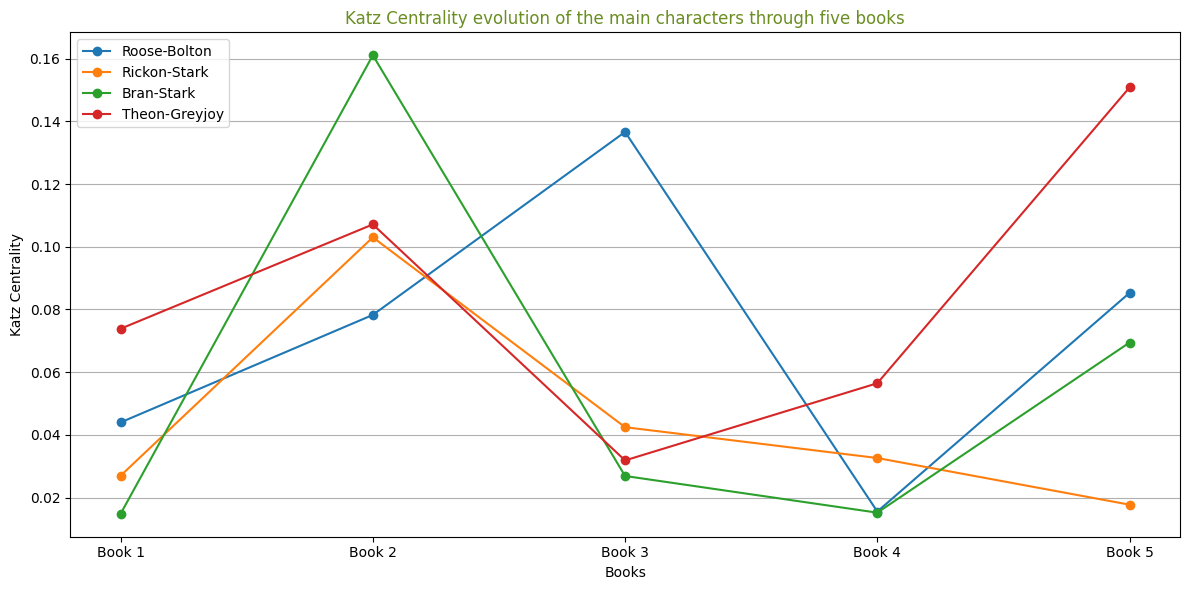

In [160]:
show_evolution([top_katz_nodes_1, top_katz_nodes_2, top_katz_nodes_3, top_katz_nodes_4, top_katz_nodes_5],
                        top_common_nodes_KC,
                        title="Katz Centrality evolution of the main characters through five books",
                        xlabel="Books",
                        ylabel="Katz Centrality")

### Closeness Centrality

### Betweenness Centrality

### Clusters of Nodes

#### Cliques

#### Cores

#### K-Components

#### Local Clustering

### Similarity-Equivalence

#### Structural Equivalence

#### Regular Equivalence

### Homophily-Assortative Mixing

## Network

### Degree Distribution

### Eigenvector Centrality

### Closeness Centrality

### Betweeness Centrality

### Local Clustering Coefficient

### Cohesion

#### Density

#### Connectedness

#### Compactness

### Reciprocity

### Transitivity

### Centralisation and Core-periphery Indices

# Conclusions and Results